This project tries to address the problem MoonLight Energy Solutions is facing regarding their solar panel deployment project. users can choose which area to assess by selecting the filename provided as a choice.

In [13]:
import pandas as pd
import os

# File paths of the CSV data
file_paths = {
    1: "benin-malanville.csv",
    2: "sierraleone-bumbuna.csv",
    3: "togo-dapaong_qc.csv"
}

# Function to display the choices and get user input
def choose_file():
    print("Please choose a file:")
    for key, path in file_paths.items():
        print(f"{key}: {path}")

    try:
        choice = int(input("Enter the number corresponding to your choice: "))
        if choice in file_paths:
            return file_paths[choice]
        else:
            print("Invalid choice. Please try again.")
            return choose_file()
    except ValueError:
        print("Invalid input. Please enter a number.")
        return choose_file()

# Get the user's choice
file_name = choose_file()
file_path = "../../data/" + file_name
print(f"You selected: {file_path}")
# Define expected ranges for validation
expected_ranges = {
    "GHI (W/m²)": (0, 1200),
    "DNI (W/m²)": (0, 1200),
    "DHI (W/m²)": (0, 1200),
    "ModA (W/m²)": (0, 1200),
    "ModB (W/m²)": (0, 1200),
    "Tamb (°C)": (-50, 60),
    "RH (%)": (0, 100),
    "WS (m/s)": (0, 60),
    "WSgust (m/s)": (0, 100),
    "BP (hPa)": (850, 1100),
    "Precipitation (mm/min)": (0, 10),
    "TModA (°C)": (-50, 90),
    "TModB (°C)": (-50, 90),
    "Cleaning (1 or 0)": (0, 1),
}

print("Current directory: ", os.getcwd())
# Load the data
try:
    data = pd.read_csv(file_path, parse_dates=["Timestamp"])
    print(f"Data successfully loaded from {file_path}.")
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Data Quality Checks
issues = []

# 1. Check for missing values
missing_summary = data.isnull().sum()
missing_issues = missing_summary[missing_summary > 0]
if not missing_issues.empty:
    issues.append(f"Missing values found:\n{missing_issues}")

#  Data type validation
for column, dtype in data.dtypes.items():
    if column in expected_ranges and not pd.api.types.is_numeric_dtype(dtype):
        issues.append(f"Column '{column}' has incorrect data type: {dtype}")

#  Range and threshold validation
for column, (min_val, max_val) in expected_ranges.items():
    if column in data.columns:
        out_of_range = data[(data[column] < min_val) | (data[column] > max_val)]
        if not out_of_range.empty:
            issues.append(f"Values out of range in column '{column}': {len(out_of_range)} rows")

#  Generate summary report
if issues:
    print("Data Quality Issues Found:")
    for i, issue in enumerate(issues, start=1):
        print(f"{i}. {issue}")
else:
    print("No data quality issues found.")

#  Identify numerical columns
numerical_columns = data.select_dtypes(include=["number"]).columns

#  Calculate summary statistics for numerical columns
if not numerical_columns.empty:
    print("\nSummary Statistics for Numerical Columns:")
    summary_stats = data[numerical_columns].describe().T  # Transpose for better readability
    print(summary_stats)
else:
    print("No numerical columns found in the dataset.")

Please choose a file:
1: benin-malanville.csv
2: sierraleone-bumbuna.csv
3: togo-dapaong_qc.csv
You selected: ../../data/benin-malanville.csv
Current directory:  e:\KAIM\kiam_week0\src\notebooks
Data successfully loaded from ../../data/benin-malanville.csv.
Data Quality Issues Found:
1. Missing values found:
Comments    525600
dtype: int64

Summary Statistics for Numerical Columns:
                  count        mean         std    min    25%    50%    75%  \
GHI            525600.0  240.559452  331.131327  -12.9   -2.0    1.8  483.4   
DNI            525600.0  167.187516  261.710501   -7.8   -0.5   -0.1  314.2   
DHI            525600.0  115.358961  158.691074  -12.6   -2.1    1.6  216.3   
ModA           525600.0  236.589496  326.894859    0.0    0.0    4.5  463.7   
ModB           525600.0  228.883576  316.536515    0.0    0.0    4.3  447.9   
Tamb           525600.0   28.179683    5.924297   11.0   24.2   28.0   32.3   
RH             525600.0   54.487969   28.073069    2.1   28.8 

<Figure size 1000x600 with 0 Axes>

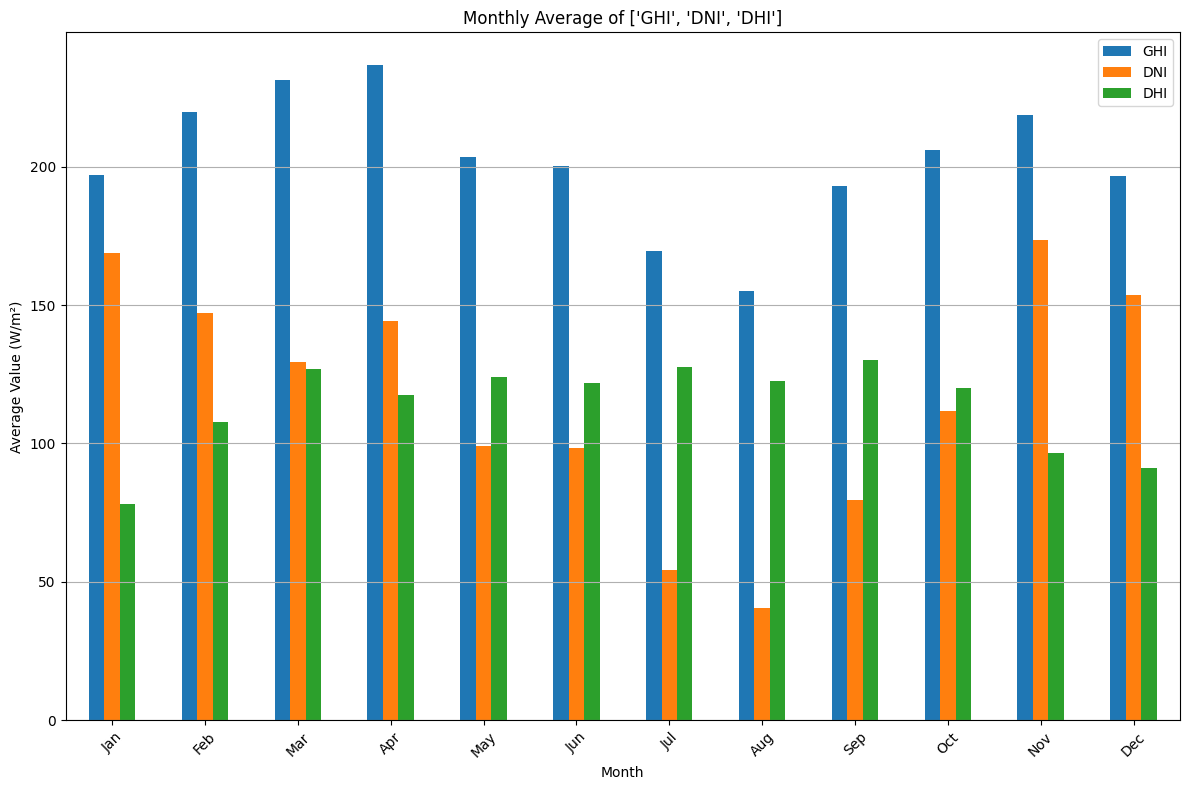

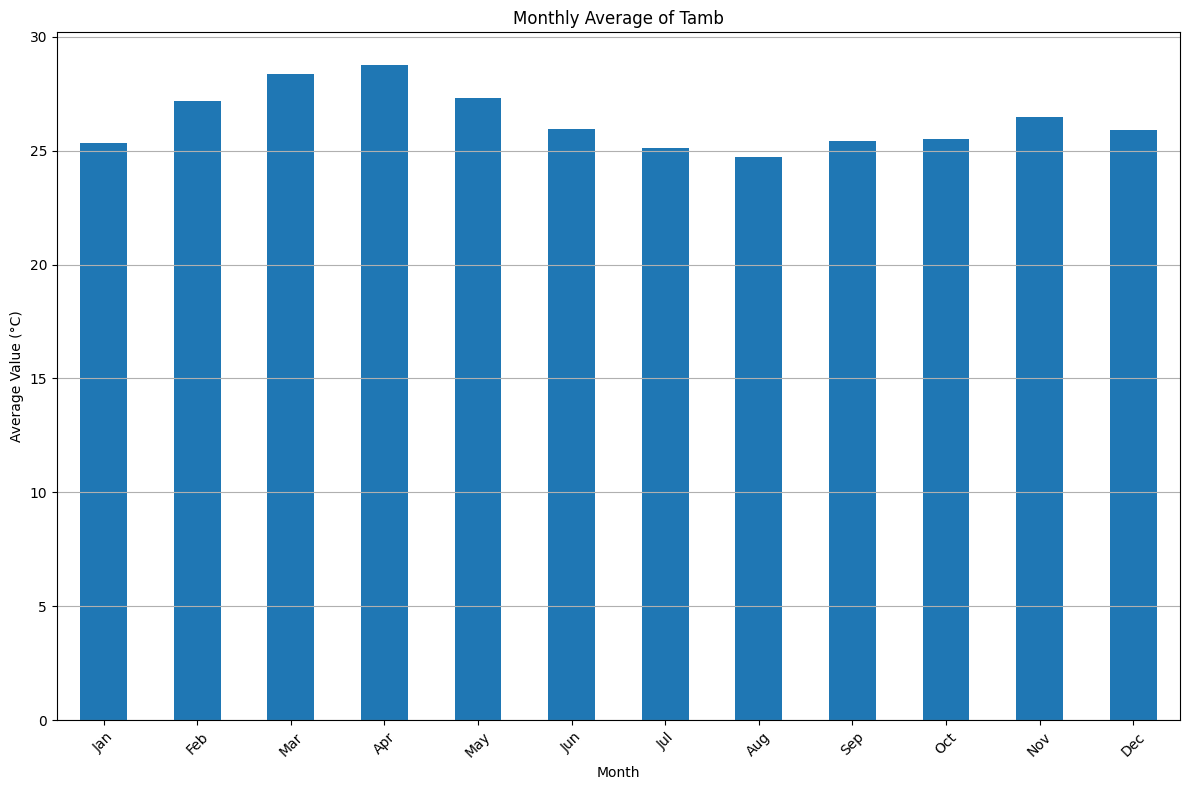

<Figure size 1000x600 with 0 Axes>

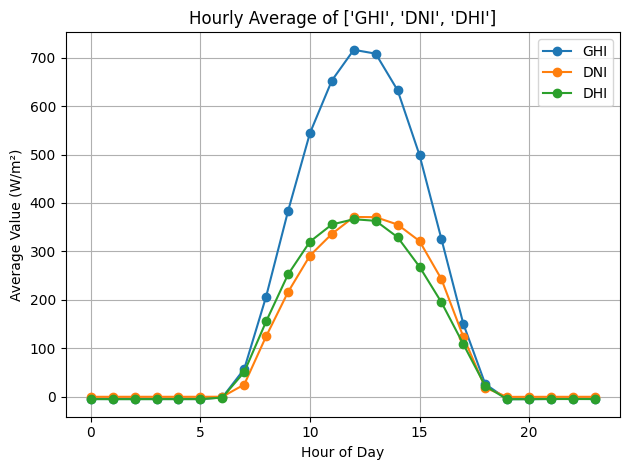

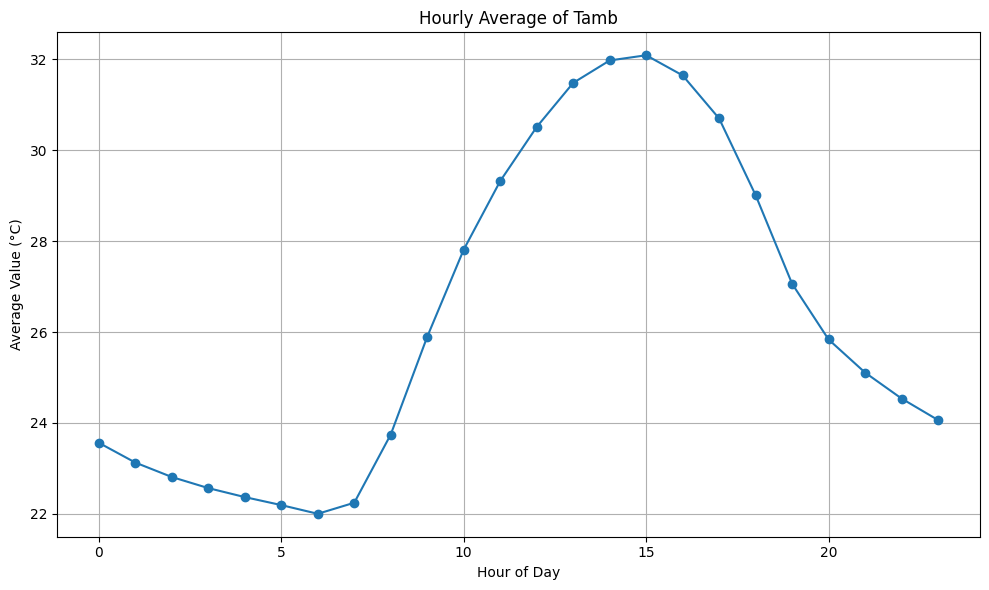

No data available for 2024-01-01.


In [2]:
import matplotlib.pyplot as plt

# Ensure the Timestamp column is properly parsed as datetime
if "Timestamp" not in data.columns or not pd.api.types.is_datetime64_any_dtype(data["Timestamp"]):
    print("Timestamp column is missing or not in datetime format.")
    exit()

# Extract useful time components for analysis
data["Month"] = data["Timestamp"].dt.month
data["Hour"] = data["Timestamp"].dt.hour
data["Date"] = data["Timestamp"].dt.date

# List of columns to analyze
columns_to_name = ["GHI (W/m²)", "DNI (W/m²)", "DHI (W/m²)", "Tamb (°C)"]
columns_to_analyze = ["GHI", "DNI", "DHI", "Tamb"]

# Plot for monthly averages 
monthly_avg = data.groupby("Month")[columns_to_analyze[0:3]].mean()
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind="bar", figsize=(12, 8))
plt.title(f"Monthly Average of {columns_to_analyze[0:3]}")
plt.xlabel("Month")
plt.ylabel("Average Value (W/m²)")
plt.xticks(range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Plot for monthly averages for Ambient Temperature
monthly_avg = data.groupby("Month")[columns_to_analyze[3]].mean()
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind="bar", figsize=(12, 8))
plt.title(f"Monthly Average of {columns_to_analyze[3]}")
plt.xlabel("Month")
plt.ylabel("Average Value (°C)")
plt.xticks(range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Plot for hourly averages GHI, DNI, DHI 

hourly_avg = data.groupby("Hour")[columns_to_analyze[0:3]].mean()
plt.figure(figsize=(10, 6))
hourly_avg.plot(kind="line", marker="o" )
plt.title(f"Hourly Average of {columns_to_analyze[0:3]}")
plt.xlabel("Hour of Day")
plt.ylabel("Average Value (W/m²)")
plt.grid(axis="both")
plt.tight_layout()
plt.show()

# Plot for hourly averages ambient temperature

hourly_avg = data.groupby("Hour")[columns_to_analyze[3]].mean()
plt.figure(figsize=(10, 6))
hourly_avg.plot(kind="line", marker="o" )
plt.title(f"Hourly Average of {columns_to_analyze[3]}")
plt.xlabel("Hour of Day")
plt.ylabel("Average Value (°C)")
plt.grid(axis="both")
plt.tight_layout()
plt.show()

# Plot for a specific date to observe anomalies (separate plots for each column)
specific_date = "2024-01-01"  # Replace with any date in your dataset
specific_day_data = data[data["Date"] == pd.to_datetime(specific_date).date()]

if not specific_day_data.empty:
    for column in columns_to_analyze:
        plt.figure(figsize=(10, 6))
        plt.plot(specific_day_data["Timestamp"], specific_day_data[column], marker="o", label=column)
        plt.title(f"Time Series of {column} on {specific_date}")
        plt.xlabel("Timestamp")
        plt.ylabel("Value")
        plt.legend()
        plt.grid(axis="both")
        plt.tight_layout()
        plt.show()
else:
    print(f"No data available for {specific_date}.")


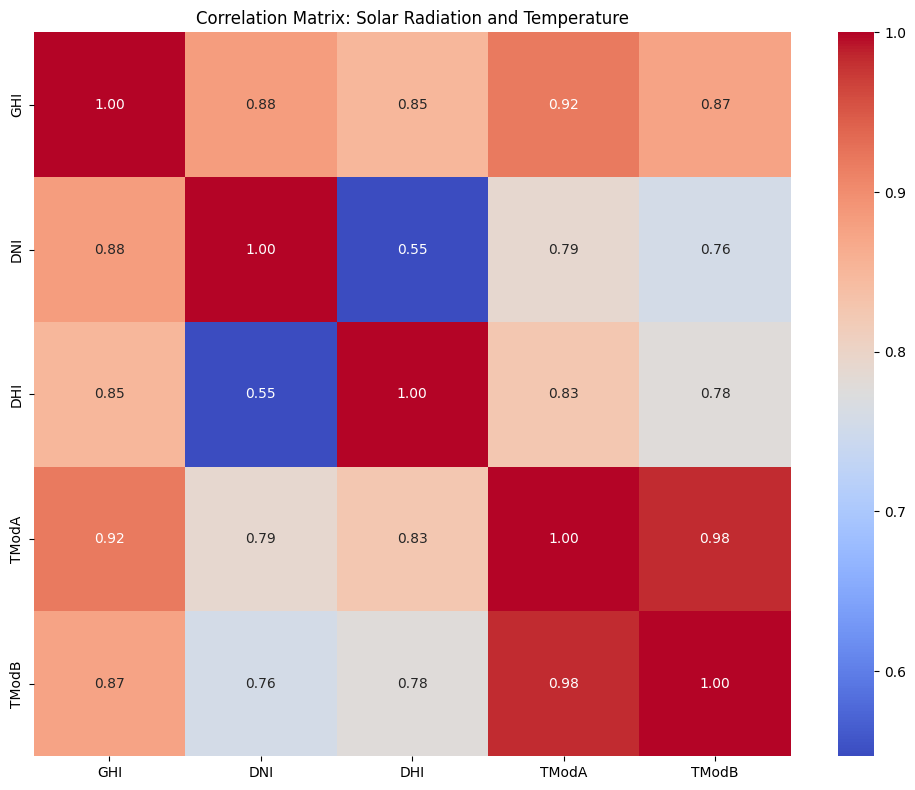

<Figure size 1200x1200 with 0 Axes>

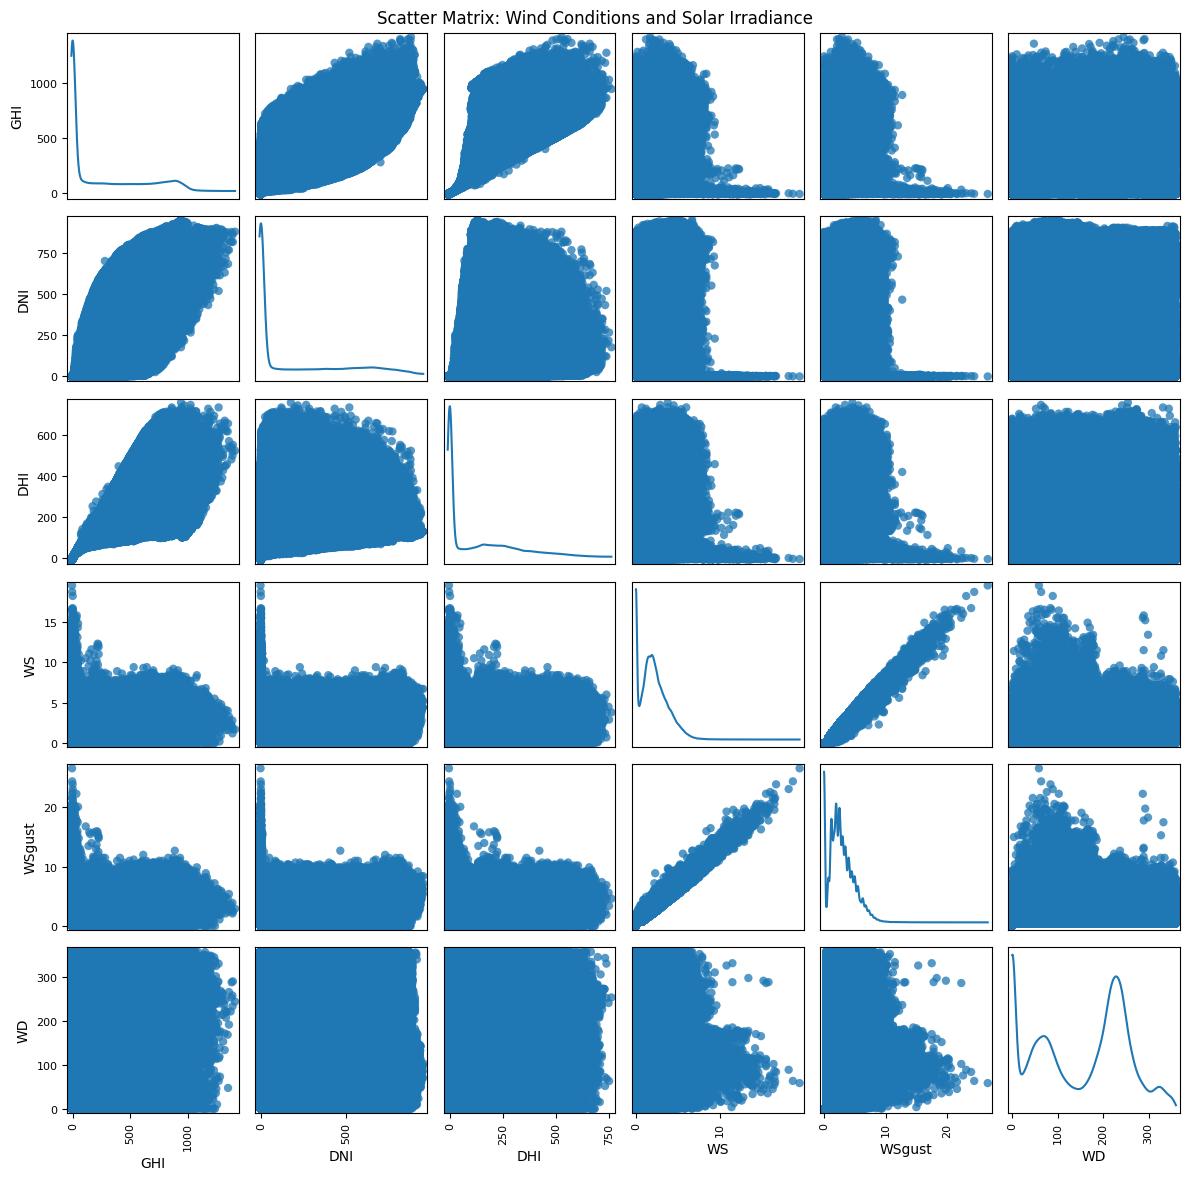

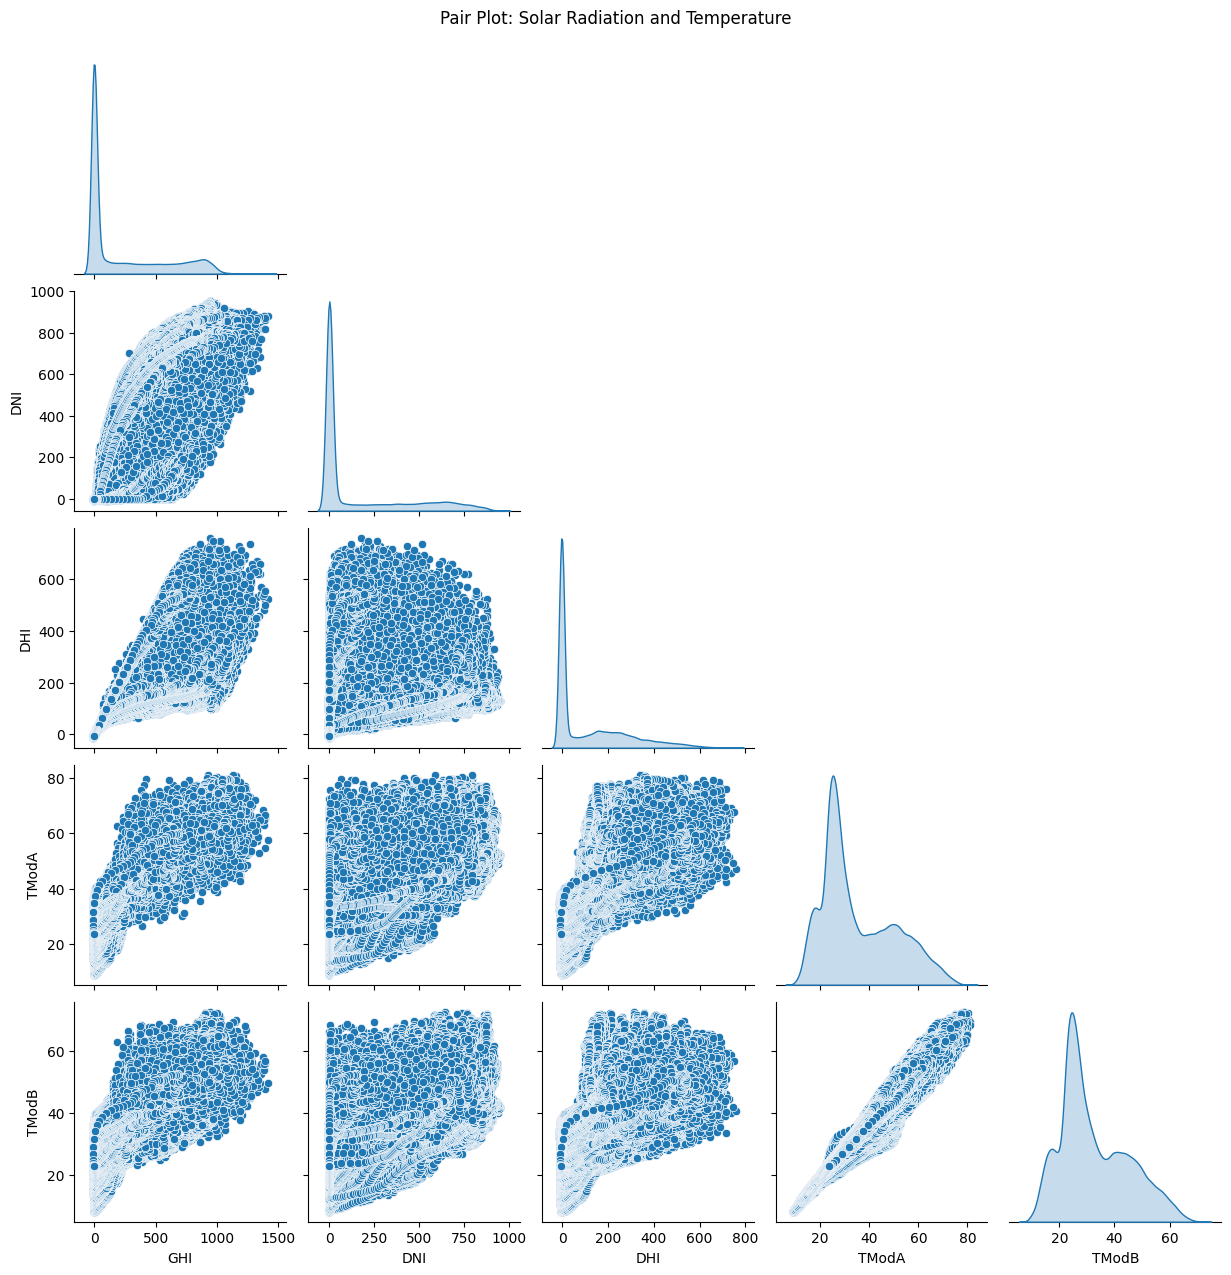

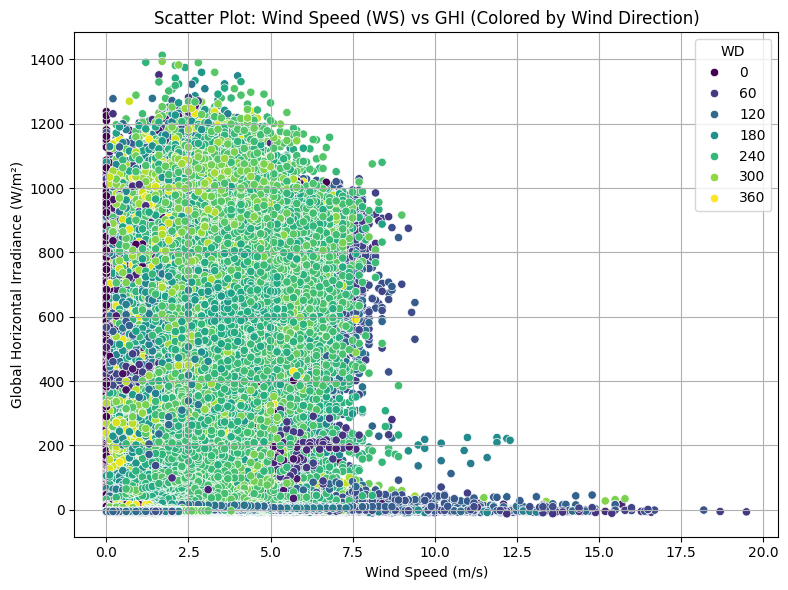

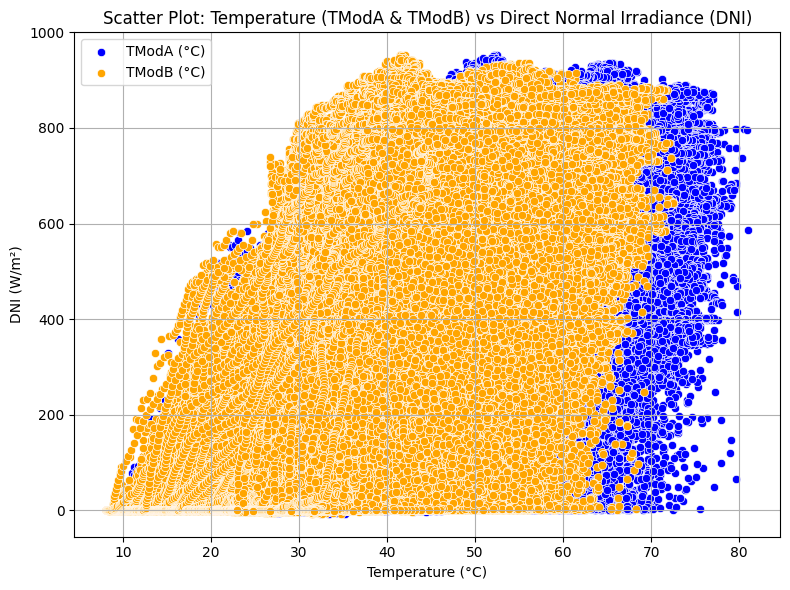

In [8]:

import seaborn as sns
from pandas.plotting import scatter_matrix


# Variables for correlation analysis
solar_radiation = ["GHI", "DNI", "DHI"]
temperature_measures = ["TModA", "TModB"]
wind_conditions = ["WS", "WSgust", "WD"]
all_vars = solar_radiation + temperature_measures + wind_conditions

# Check if all variables exist in the data
missing_vars = [col for col in all_vars if col not in data.columns]
if missing_vars:
    print(f"Missing columns: {missing_vars}")
    exit()

# --- Correlation Matrix and Heatmap (Solar Radiation and Temperature) ---
correlation_solar_temp = data[solar_radiation + temperature_measures].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_solar_temp, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix: Solar Radiation and Temperature")
plt.tight_layout()
plt.show()

# --- Scatter Matrix for Wind Conditions and Solar Irradiance ---
wind_solar_vars = solar_radiation + wind_conditions

plt.figure(figsize=(12, 12))
scatter_matrix(data[wind_solar_vars], alpha=0.75, figsize=(12, 12), diagonal="kde", marker="o")
plt.suptitle("Scatter Matrix: Wind Conditions and Solar Irradiance")
plt.tight_layout()
plt.show()

# --- Pair Plot for Solar Radiation and Temperature ---
pair_plot_data = data[solar_radiation + temperature_measures]

sns.pairplot(pair_plot_data, kind="scatter", diag_kind="kde", corner=True)
plt.suptitle("Pair Plot: Solar Radiation and Temperature", y=1.02)
plt.show()

# --- Additional Insightful Plots ---
# Wind speed (WS) vs GHI
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="WS", y="GHI", hue="WD", palette="viridis")
plt.title("Scatter Plot: Wind Speed (WS) vs GHI (Colored by Wind Direction)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Temperature (TModA and TModB) vs DNI
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="TModA", y="DNI", label="TModA (°C)", color="blue")
sns.scatterplot(data=data, x="TModB", y="DNI", label="TModB (°C)", color="orange")
plt.title("Scatter Plot: Temperature (TModA & TModB) vs Direct Normal Irradiance (DNI)")
plt.xlabel("Temperature (°C)")
plt.ylabel("DNI (W/m²)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Correlation Matrix:
           Tamb     TModA     TModB       GHI       DNI       DHI        RH
Tamb   1.000000  0.831892  0.855149  0.641261  0.578346  0.568655 -0.791937
TModA  0.831892  1.000000  0.993228  0.923092  0.816449  0.808479 -0.688057
TModB  0.855149  0.993228  1.000000  0.912260  0.808194  0.807551 -0.698477
GHI    0.641261  0.923092  0.912260  1.000000  0.869108  0.865815 -0.546677
DNI    0.578346  0.816449  0.808194  0.869108  1.000000  0.536710 -0.548800
DHI    0.568655  0.808479  0.807551  0.865815  0.536710  1.000000 -0.431910
RH    -0.791937 -0.688057 -0.698477 -0.546677 -0.548800 -0.431910  1.000000


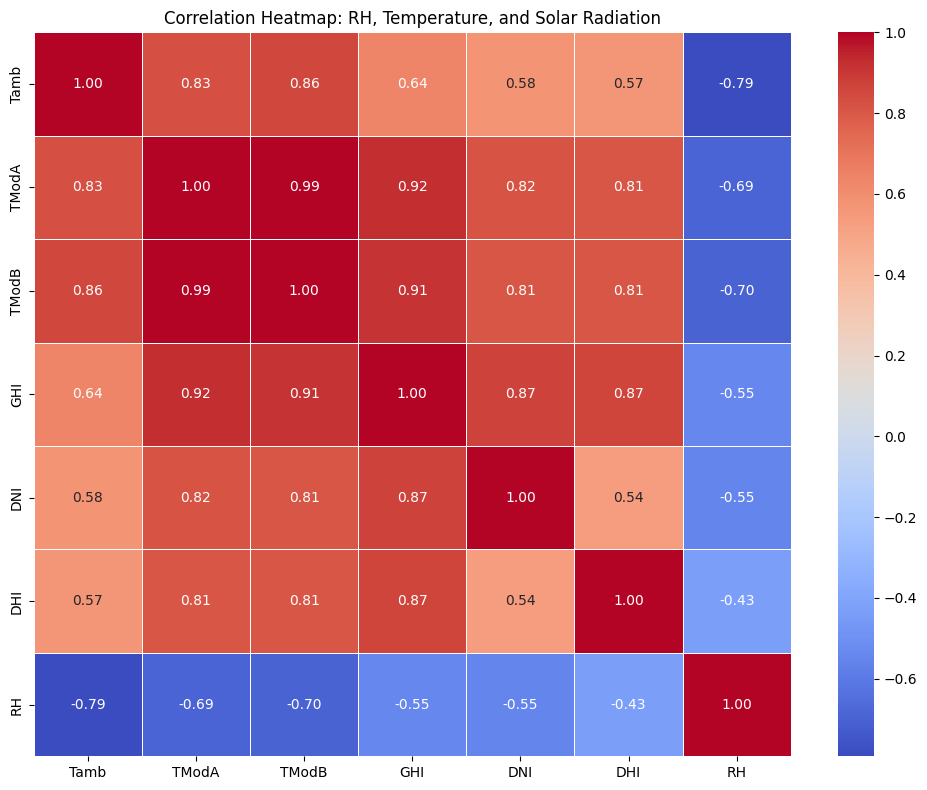

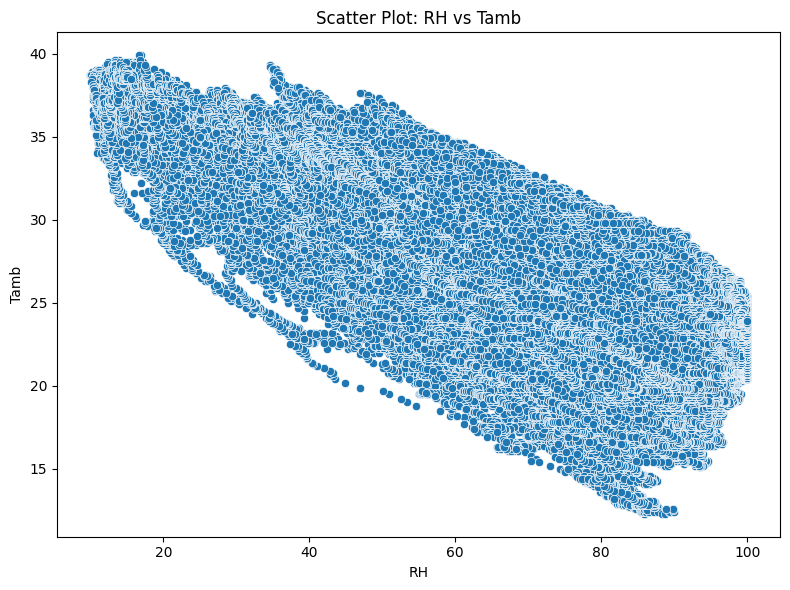

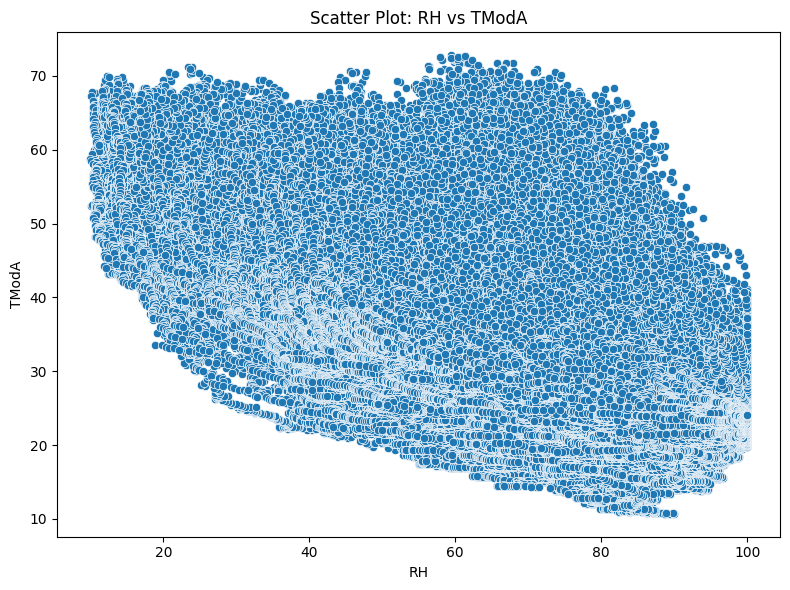

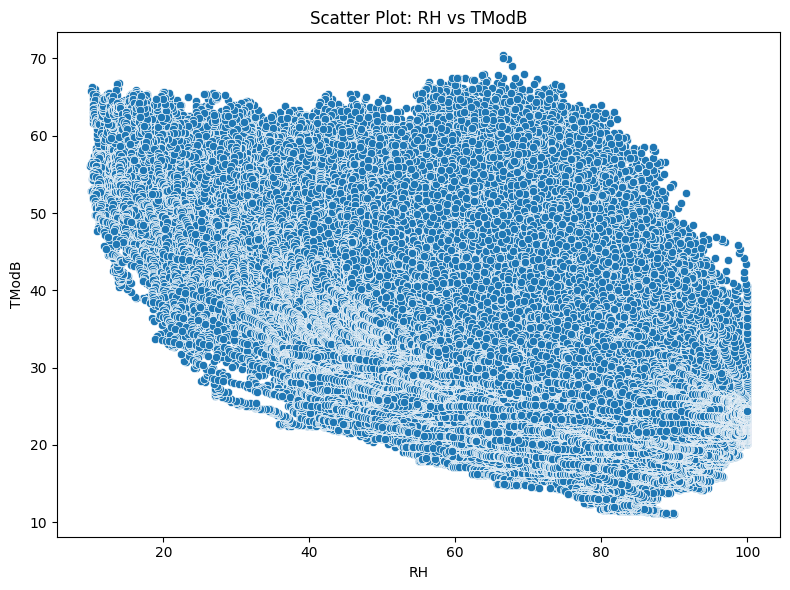

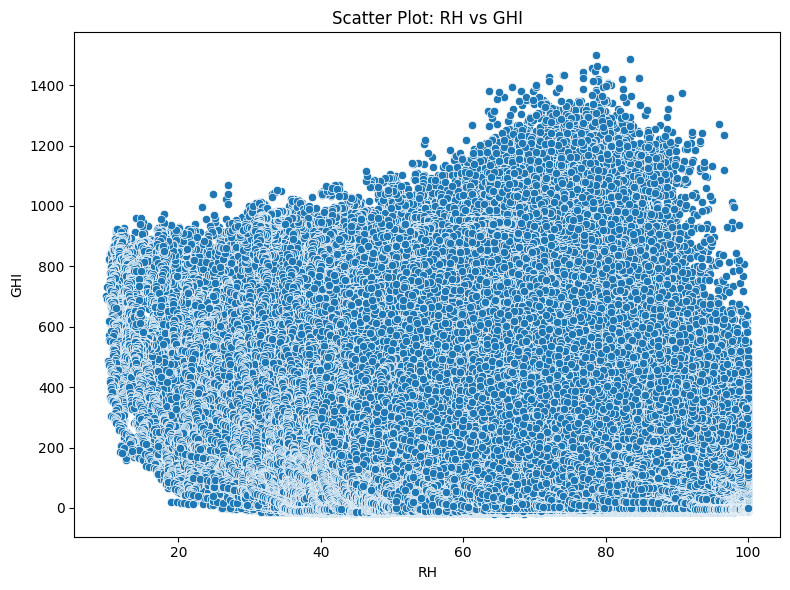

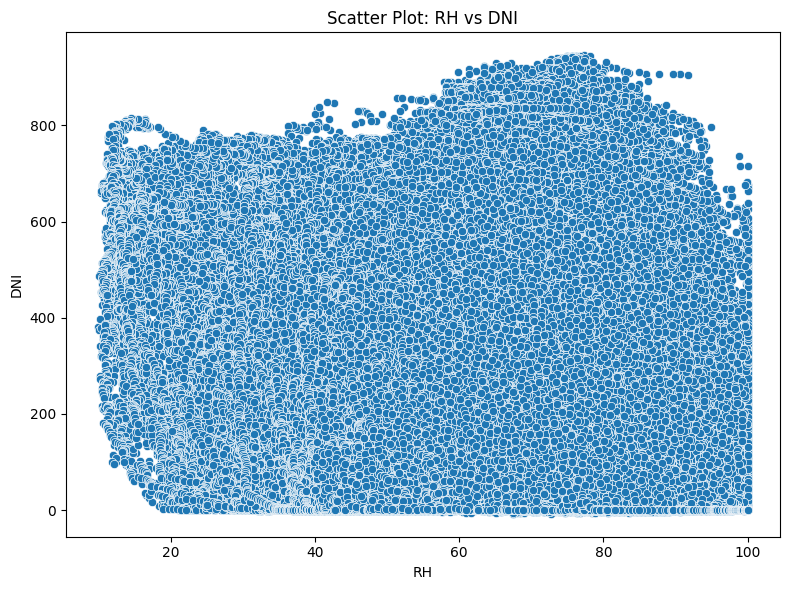

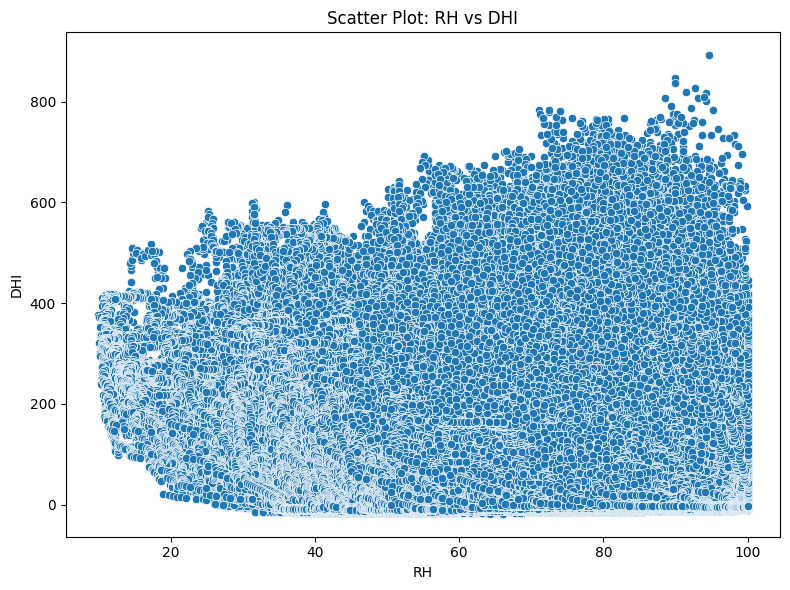

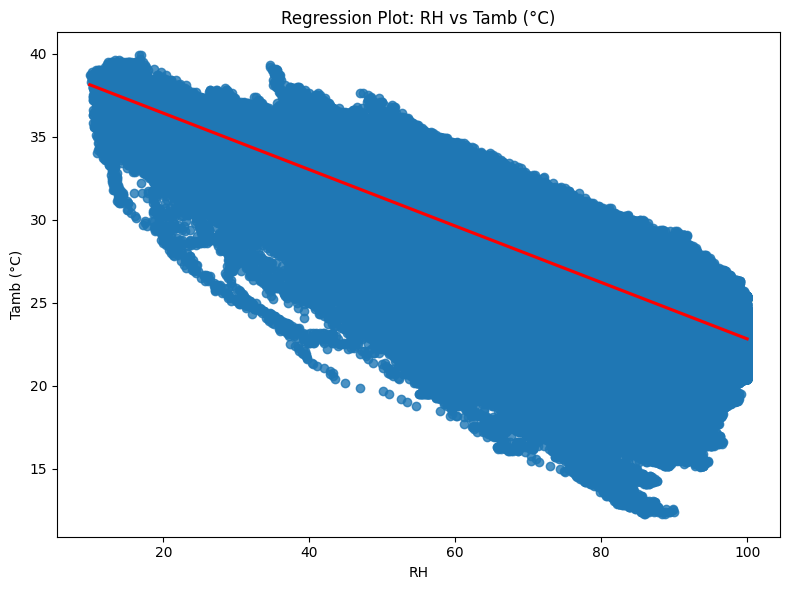

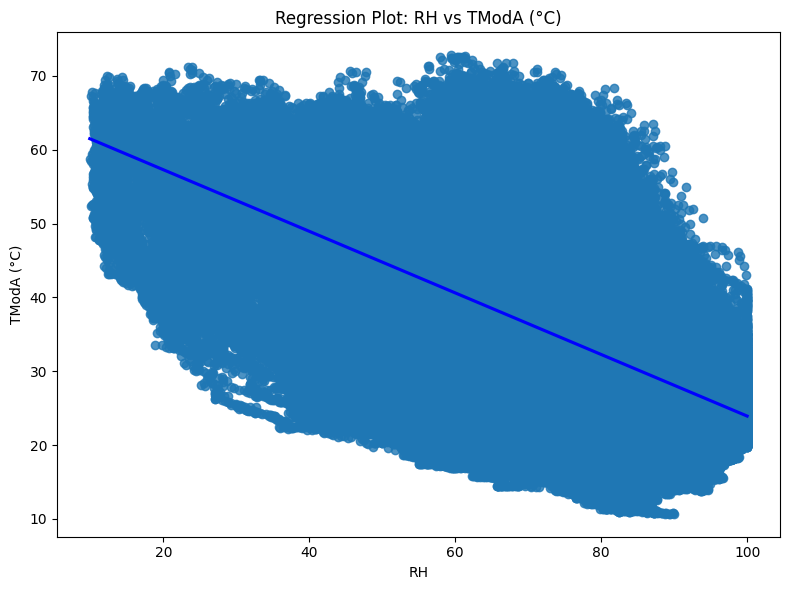

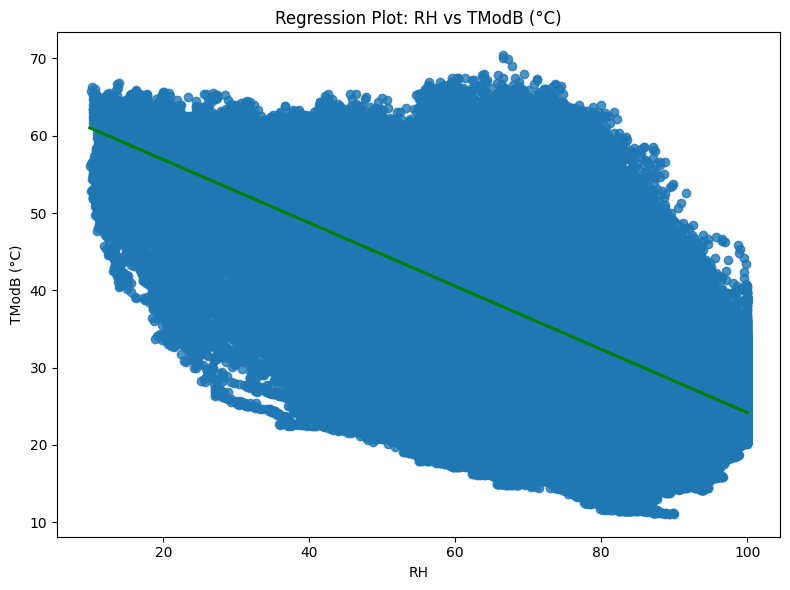

In [5]:
import seaborn as sns

# Columns of interest
temperature_columns = ["Tamb", "TModA", "TModB"]
radiation_columns = ["GHI", "DNI", "DHI"]
rh_column = "RH"

# --- Correlation Analysis ---
# Correlation matrix for RH, temperature, and solar radiation
correlation_data = data[temperature_columns + radiation_columns + [rh_column]].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_data)

# --- Heatmap of Correlations ---
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: RH, Temperature, and Solar Radiation")
plt.tight_layout()
plt.show()

# --- Scatter Plots to Visualize Relationships ---
# Scatter plot between RH and Temperature columns (Tamb, TModA, TModB)
for temp_col in temperature_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=rh_column, y=temp_col)
    plt.title(f"Scatter Plot: {rh_column} vs {temp_col}")
    plt.xlabel(rh_column)
    plt.ylabel(temp_col)
    plt.tight_layout()
    plt.show()

# Scatter plot between RH and Solar Radiation columns (GHI, DNI, DHI)
for rad_col in radiation_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=rh_column, y=rad_col)
    plt.title(f"Scatter Plot: {rh_column} vs {rad_col}")
    plt.xlabel(rh_column)
    plt.ylabel(rad_col)
    plt.tight_layout()
    plt.show()

# --- Regression Line Plot for RH and Temperature ---
# Plot with regression line for RH vs Tamb (you can repeat this for other temperature columns)
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x=rh_column, y="Tamb", line_kws={"color": "red"})
plt.title(f"Regression Plot: {rh_column} vs Tamb (°C)")
plt.xlabel(rh_column)
plt.ylabel("Tamb (°C)")
plt.tight_layout()
plt.show()

# Regression for RH vs TModA
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x=rh_column, y="TModA", line_kws={"color": "blue"})
plt.title(f"Regression Plot: {rh_column} vs TModA (°C)")
plt.xlabel(rh_column)
plt.ylabel("TModA (°C)")
plt.tight_layout()
plt.show()

# Regression for RH vs TModB
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x=rh_column, y="TModB", line_kws={"color": "green"})
plt.title(f"Regression Plot: {rh_column} vs TModB (°C)")
plt.xlabel(rh_column)
plt.ylabel("TModB (°C)")
plt.tight_layout()
plt.show()



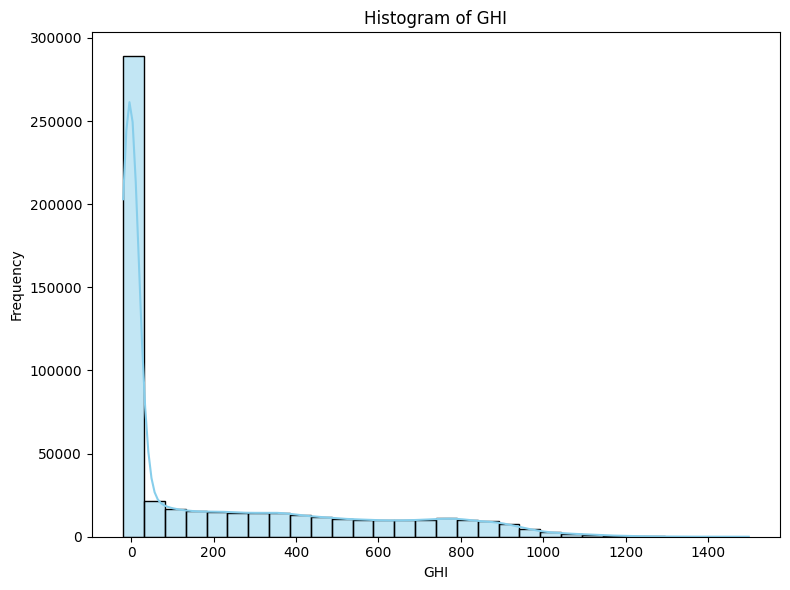

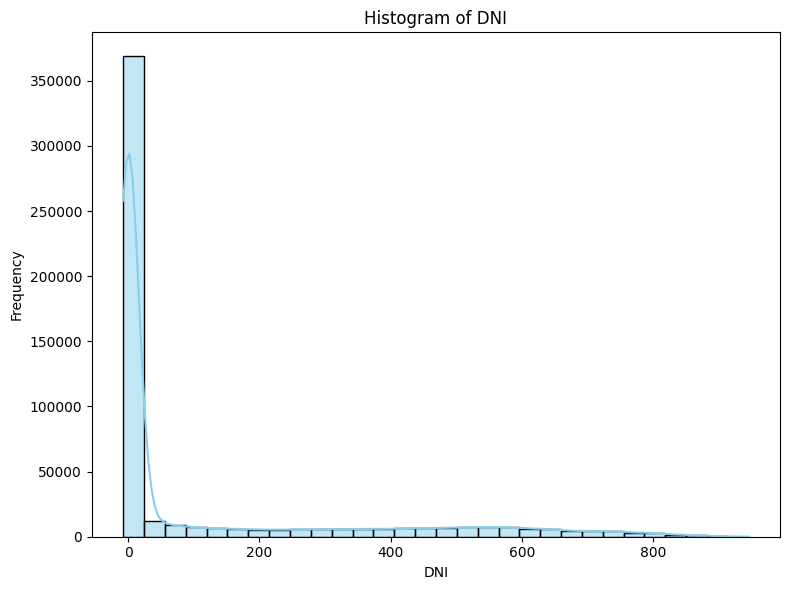

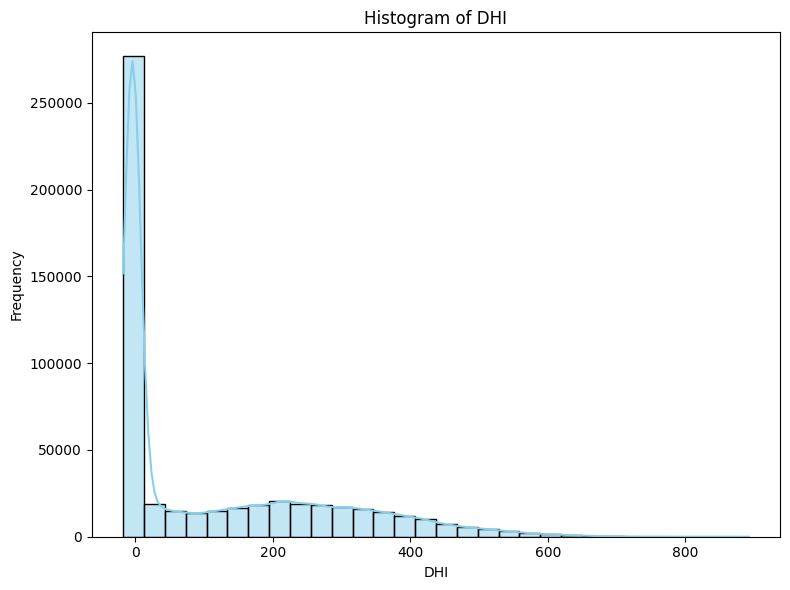

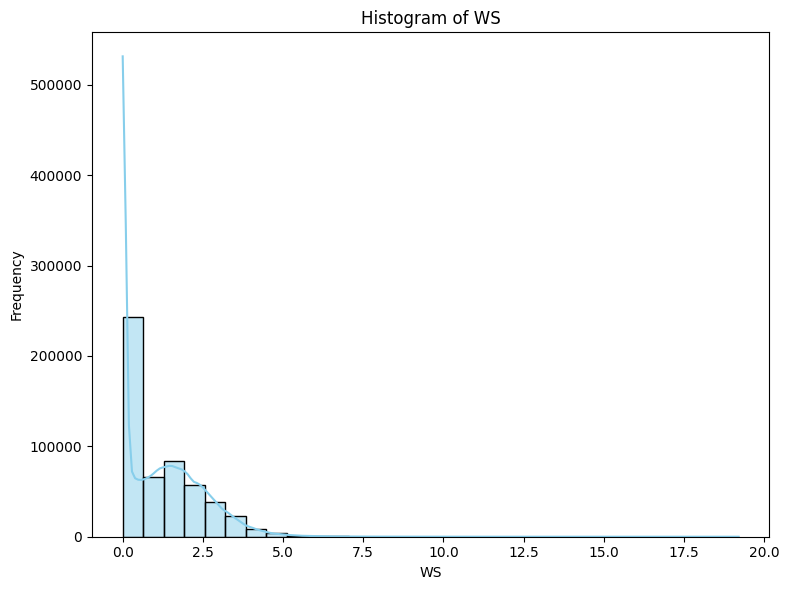

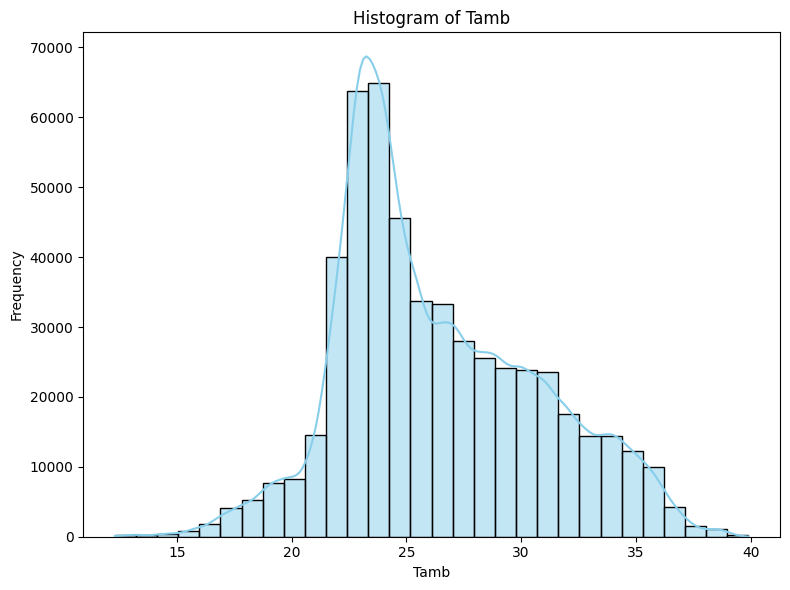

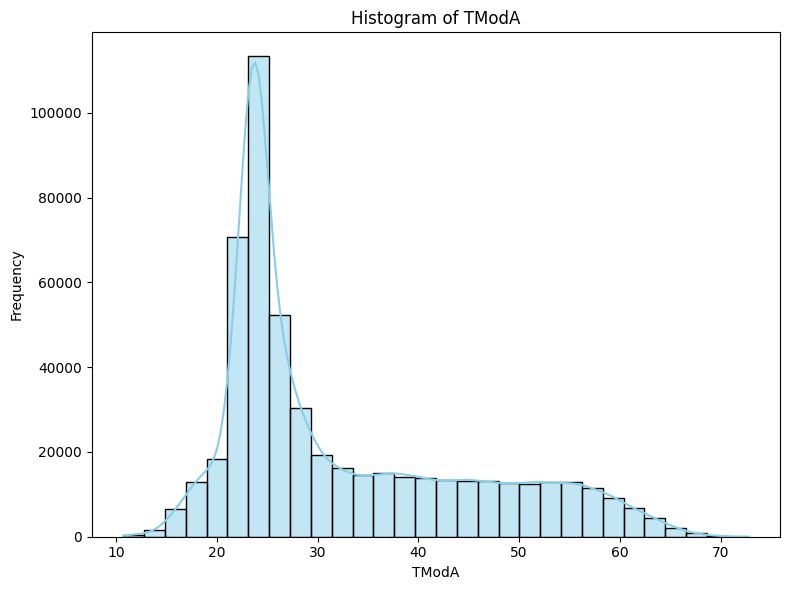

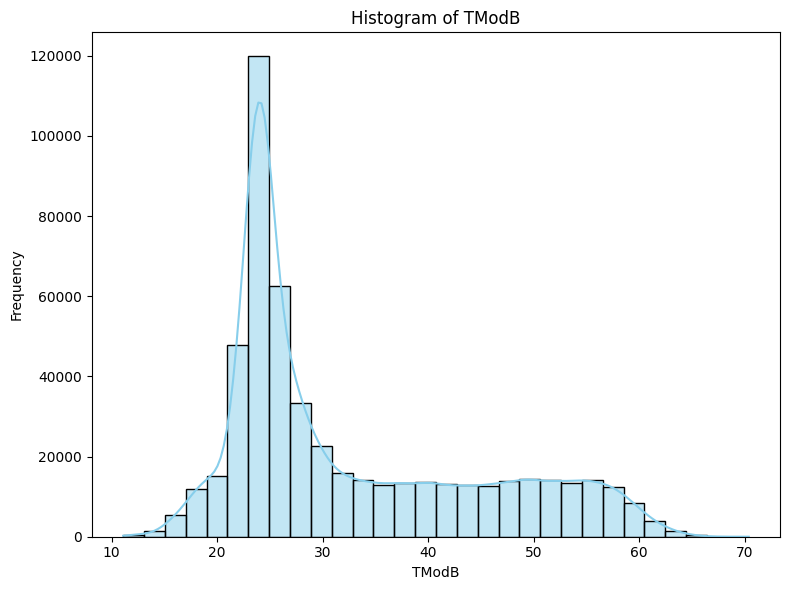

In [6]:

# Variables for histograms
columns_for_histograms = ["GHI", "DNI", "DHI", "WS", "Tamb", "TModA", "TModB"]

# --- Create Histograms for the selected variables ---
for col in columns_for_histograms:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True, bins=30, color="skyblue", edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [7]:
from scipy.stats import zscore

# List of columns for Z-Score calculation
columns_for_zscore = ["GHI", "DNI", "DHI", "WS", "Tamb", "TModA", "TModB"]

# --- Calculate Z-scores ---
z_scores = data[columns_for_zscore].apply(zscore)

# Set a threshold for identifying outliers (e.g., Z-score > 3 or Z-score < -3)
outliers = z_scores[(z_scores > 3) | (z_scores < -3)]

# Flagging outliers in the original data (adding a new column for each variable indicating if it is an outlier)
for col in columns_for_zscore:
    data[f"{col}_outlier"] = (z_scores[col] > 3) | (z_scores[col] < -3)

# Print a few outlier flagged rows
print("\nRows with flagged outliers:")
print(data[data.filter(like="_outlier").any(axis=1)][[ "Timestamp"] + [col + "_outlier" for col in columns_for_zscore]])

# save the data with outlier flags to a new CSV file
data.to_csv("../../data/with_outliers_flagged.csv", index=False)




Rows with flagged outliers:
                 Timestamp  GHI_outlier  DNI_outlier  DHI_outlier  WS_outlier  \
653    2021-10-30 10:54:00        False        False         True       False   
654    2021-10-30 10:55:00        False        False         True       False   
655    2021-10-30 10:56:00        False        False         True       False   
656    2021-10-30 10:57:00        False        False         True       False   
657    2021-10-30 10:58:00        False        False         True       False   
...                    ...          ...          ...          ...         ...   
522184 2022-10-27 15:05:00        False        False        False        True   
522185 2022-10-27 15:06:00        False        False        False        True   
522194 2022-10-27 15:15:00        False        False        False        True   
523792 2022-10-28 17:53:00        False        False        False        True   
523794 2022-10-28 17:55:00        False        False        False        True   

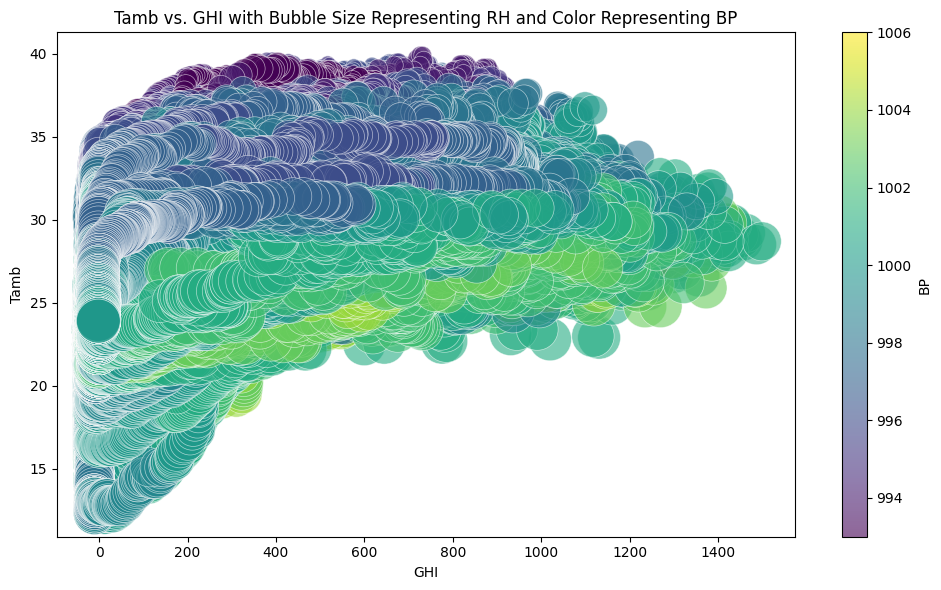

In [9]:

# Define the columns for the bubble chart
x_column = "GHI"  # X-axis
y_column = "Tamb"  # Y-axis
size_column = "RH"  # Size of bubbles (e.g., Relative Humidity)
color_column = "BP"  # Color of bubbles (optional, Barometric Pressure)

# Normalize the size (to avoid huge bubbles) - scaling RH to a reasonable size
size_scale = 10  # You can adjust this scaling factor based on your data

# Create the bubble chart
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data[x_column], data[y_column], s=data[size_column] * size_scale, 
                      c=data[color_column], cmap='viridis', alpha=0.6, edgecolors="w", linewidth=0.5)

# Add labels and title
plt.title(f"{y_column} vs. {x_column} with Bubble Size Representing {size_column} and Color Representing {color_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)

# Add a color bar for the bubble color (representing BP or another variable)
plt.colorbar(scatter, label=color_column)

# Show the plot
plt.tight_layout()
plt.show()


In [15]:
# 1. Remove columns with entirely missing values (e.g., Comments)
data.dropna(axis=1, how='all', inplace=True)

# 2. Handle missing values for numerical columns
# For numerical columns, we can either drop rows with missing values or fill them with mean/median
# For example, we'll fill missing values with the median for GHI, DNI, DHI, etc.

numerical_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 
                     'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 
                     'WD', 'BP', 'Precipitation', 
                     'TModA', 'TModB']

# Filling missing values with the median for numerical columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# 3. Remove duplicates (if any)
data.drop_duplicates(inplace=True)

# 4. Handle outliers or anomalies
# We can define a simple rule for detecting anomalies (e.g., negative values for GHI, DNI, etc.)
# In practice, values for solar radiation and temperature should never be negative.
# We'll replace such anomalies with NaN and later fill them with the median.

def handle_anomalies(df):
    # Example: Replace negative values in GHI, DNI, DHI, etc. with NaN (as these are impossible)
    columns_with_anomalies = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 
                              'Tamb', 'TModA', 'TModB']
    for col in columns_with_anomalies:
        df.loc[df[col] < 0, col] = pd.NA  # Replace negative values with NaN
    
    # After handling anomalies, fill the NaN values with the median for these columns
    df[columns_with_anomalies] = df[columns_with_anomalies].fillna(df[columns_with_anomalies].median())

    return df

data = handle_anomalies(data)


# 6. Recheck the first few rows to confirm the changes
print(data.head())

# Save the cleaned data for further analysis
cleaned_file_path = "../../data/cleaned/"+ file_name
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}.")


            Timestamp    GHI    DNI    DHI  ModA  ModB  Tamb    RH   WS  \
0 2021-08-09 00:01:00  474.2  345.7  213.4   0.0   0.0  26.2  93.4  0.0   
1 2021-08-09 00:02:00  474.2  345.7  213.4   0.0   0.0  26.2  93.6  0.0   
2 2021-08-09 00:03:00  474.2  345.7  213.4   0.0   0.0  26.2  93.7  0.3   
3 2021-08-09 00:04:00  474.2  345.7  213.4   0.0   0.0  26.2  93.3  0.2   
4 2021-08-09 00:05:00  474.2  345.7  213.4   0.0   0.0  26.2  93.3  0.1   

   WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0     0.4      0.1  122.1      0.0  998         0            0.0   26.3   26.2  
1     0.0      0.0    0.0      0.0  998         0            0.0   26.3   26.2  
2     1.1      0.5  124.6      1.5  997         0            0.0   26.4   26.2  
3     0.7      0.4  120.3      1.3  997         0            0.0   26.4   26.3  
4     0.7      0.3  113.2      1.0  997         0            0.0   26.4   26.3  
Cleaned data saved to ../../data/cleaned/benin-malanville.csv.
